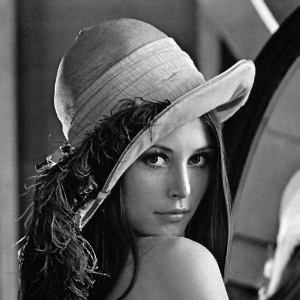

In [1]:
#Task1
import cv2
from google.colab.patches import cv2_imshow

# Load an image
image = cv2.imread('/content/d1.jpg')

# Resize using linear interpolation
resized_linear = cv2.resize(image, (300, 300), interpolation=cv2.INTER_LINEAR)

cv2_imshow(resized_linear)

cv2.waitKey(0)
cv2.destroyAllWindows()

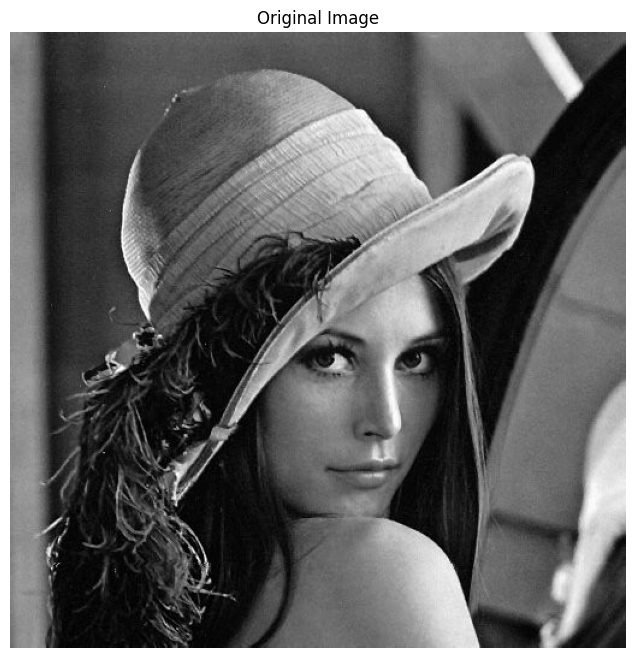

In [2]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/d1.jpg')

# Convert the image to RGB for proper color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(8, 8))
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [3]:
# ----------------------------------------------
# 1. IMAGE RESIZING
# ----------------------------------------------

# Linear Interpolation
resized_linear = cv2.resize(image, (600, 600), interpolation=cv2.INTER_LINEAR)

# Nearest Neighbor Interpolation
resized_nn = cv2.resize(image, (600, 600), interpolation=cv2.INTER_NEAREST)

# Cubic (Polynomial) Interpolation
resized_cubic = cv2.resize(image, (600, 600), interpolation=cv2.INTER_CUBIC)

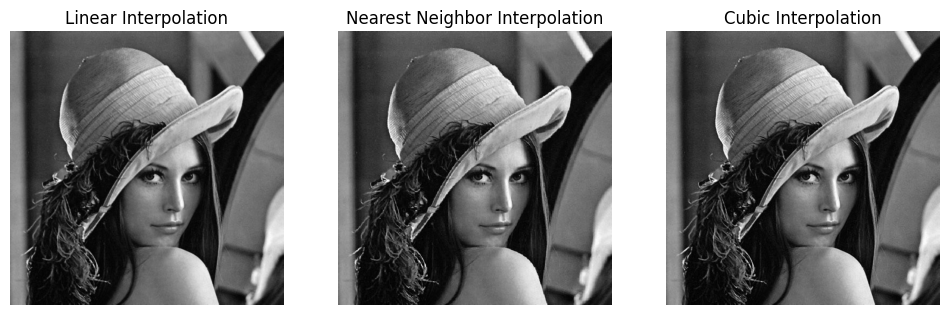

In [4]:
# Display Resized Images
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.title("Linear Interpolation")
plt.imshow(cv2.cvtColor(resized_linear, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Nearest Neighbor Interpolation")
plt.imshow(cv2.cvtColor(resized_nn, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Cubic Interpolation")
plt.imshow(cv2.cvtColor(resized_cubic, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

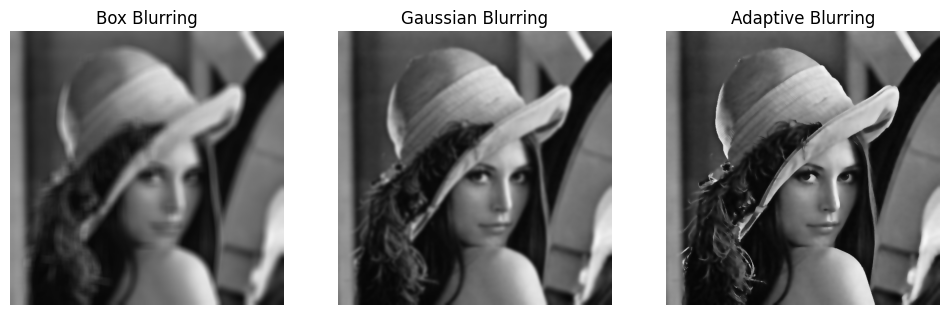

In [5]:
# ----------------------------------------------
# 2. IMAGE BLURRING
# ----------------------------------------------


# Box Blurring
box_blur = cv2.blur(image, (15, 15))

# Gaussian Blurring
gaussian_blur = cv2.GaussianBlur(image, (15, 15), 0)

# Adaptive Blurring (Bilateral Filtering)
adaptive_blur = cv2.bilateralFilter(image, 9,150, 150)

# Display Blurred Images
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.title("Box Blurring")
plt.imshow(cv2.cvtColor(box_blur, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Gaussian Blurring")
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Adaptive Blurring")
plt.imshow(cv2.cvtColor(adaptive_blur, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

In [6]:
#Task2
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, classification_report
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt


In [7]:
# Load MNIST dataset using sklearn's load_digits
digits = load_digits()
X, y = digits.data, digits.target

# Dataset details
print("Dataset Details:")
print(f"Number of instances: {X.shape[0]}")
print(f"Number of attributes: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

Dataset Details:
Number of instances: 1797
Number of attributes: 64
Number of classes: 10


In [8]:
# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define K-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


### Naive Bayes Classifier ###
Cross-Validation Accuracy: 0.8226

Performance Metrics:
Accuracy: 0.8111
Precision: 0.8463
Recall: 0.8103
F1-Score: 0.8137


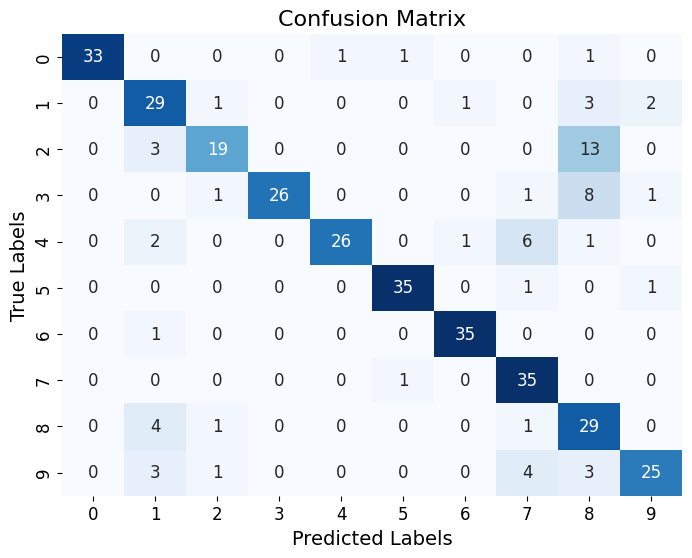


### Random Forest Classifier ###
Cross-Validation Accuracy: 0.9729

Performance Metrics:
Accuracy: 0.9611
Precision: 0.9620
Recall: 0.9607
F1-Score: 0.9607


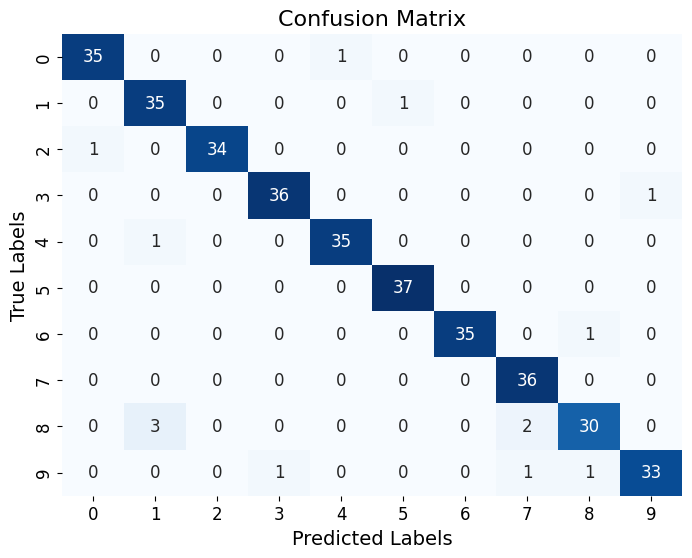

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_test, y_pred, labels):
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot using Seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})

    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Updated evaluation function
def evaluate_model_with_visuals(model, X_train, y_train, X_test, y_test, kfold, labels):
    # Cross-validation
    cv_scores = []
    for train_idx, val_idx in kfold.split(X_train, y_train):
        model.fit(X_train[train_idx], y_train[train_idx])
        y_val_pred = model.predict(X_train[val_idx])
        cv_scores.append(accuracy_score(y_train[val_idx], y_val_pred))
    print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")

    # Train the model and predict on test data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    print("\nPerformance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Display the confusion matrix
    plot_confusion_matrix(y_test, y_pred, labels)

# Example usage for Naive Bayes
print("\n### Naive Bayes Classifier ###")
nb_model = GaussianNB()
evaluate_model_with_visuals(nb_model, X_train, y_train, X_test, y_test, kfold, labels=digits.target_names)

# Example usage for Random Forest
print("\n### Random Forest Classifier ###")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model_with_visuals(rf_model, X_train, y_train, X_test, y_test, kfold, labels=digits.target_names)